In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import pandas as pd
import json
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Avoid Plotly issues
import plotly.io as pio
pio.renderers.default = 'iframe'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train_df = pd.read_csv('data/train.csv')

In [4]:
train_df.shape

(57477, 9)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              57477 non-null  int64 
 1   model_a         57477 non-null  object
 2   model_b         57477 non-null  object
 3   prompt          57477 non-null  object
 4   response_a      57477 non-null  object
 5   response_b      57477 non-null  object
 6   winner_model_a  57477 non-null  int64 
 7   winner_model_b  57477 non-null  int64 
 8   winner_tie      57477 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB


In [6]:
train_df.dtypes

id                 int64
model_a           object
model_b           object
prompt            object
response_a        object
response_b        object
winner_model_a     int64
winner_model_b     int64
winner_tie         int64
dtype: object

In [7]:
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [8]:
train_df.tail()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
57472,4294656694,gpt-4-0613,claude-1,"[""A simple mnemonic for \u03c0:\n\""How I wish ...","[""Sure, let's break it down:\n\n1. \""How\"" has...","[""Here is how that mnemonic represents the dig...",1,0,0
57473,4294692063,claude-2.0,llama-2-13b-chat,"[""In python, implement a naive Bayes with gaus...","[""Here is an implementation of a naive Bayes c...","[""Sure! Here's an implementation of a naive Ba...",1,0,0
57474,4294710549,claude-1,alpaca-13b,"[""is it unethical to work on building weapons?...","[""Working on weapons technology raises some et...","[""It depends on the context. Weapons can be us...",1,0,0
57475,4294899228,palm-2,tulu-2-dpo-70b,"[""If a bait contains 0,0025% bromadiolon then ...","[""Bromadiolone is a rodenticide which is most ...","[""As an AI language model, I do not promote or...",0,1,0
57476,4294947231,gemini-pro-dev-api,gpt-4-1106-preview,"[""three kids eat three apples in three days, h...","[""27 apples""]","[""If three kids eat three apples in three days...",1,0,0


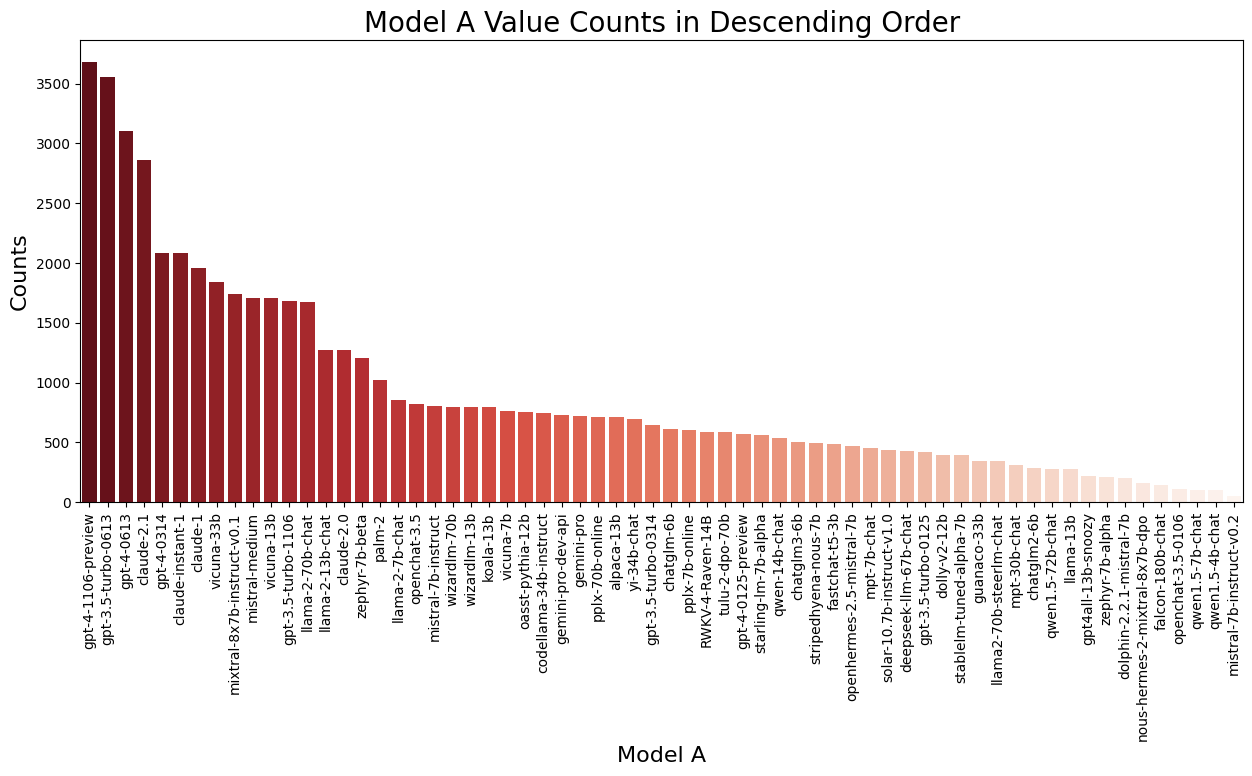

model_a
gpt-4-1106-preview          3678
gpt-3.5-turbo-0613          3553
gpt-4-0613                  3099
claude-2.1                  2859
gpt-4-0314                  2087
                            ... 
falcon-180b-chat             145
openchat-3.5-0106            108
qwen1.5-7b-chat              106
qwen1.5-4b-chat              100
mistral-7b-instruct-v0.2      54
Name: count, Length: 64, dtype: int64


In [9]:
# Get value counts in descending order
value_counts_a = train_df['model_a'].value_counts(ascending=False)

# Create a rainbow color palette with the same number of colors as bars
colors = sns.color_palette("Reds", len(value_counts_a))[::-1]

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=value_counts_a.index, y=value_counts_a.values, palette=colors)
plt.xlabel('Model A', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xticks(rotation=90)
plt.title('Model A Value Counts in Descending Order', fontsize=20)
plt.grid(False)
plt.savefig("results/info/model_a_value_counts.png", bbox_inches='tight', dpi=300)
plt.show()

print(train_df['model_a'].value_counts())

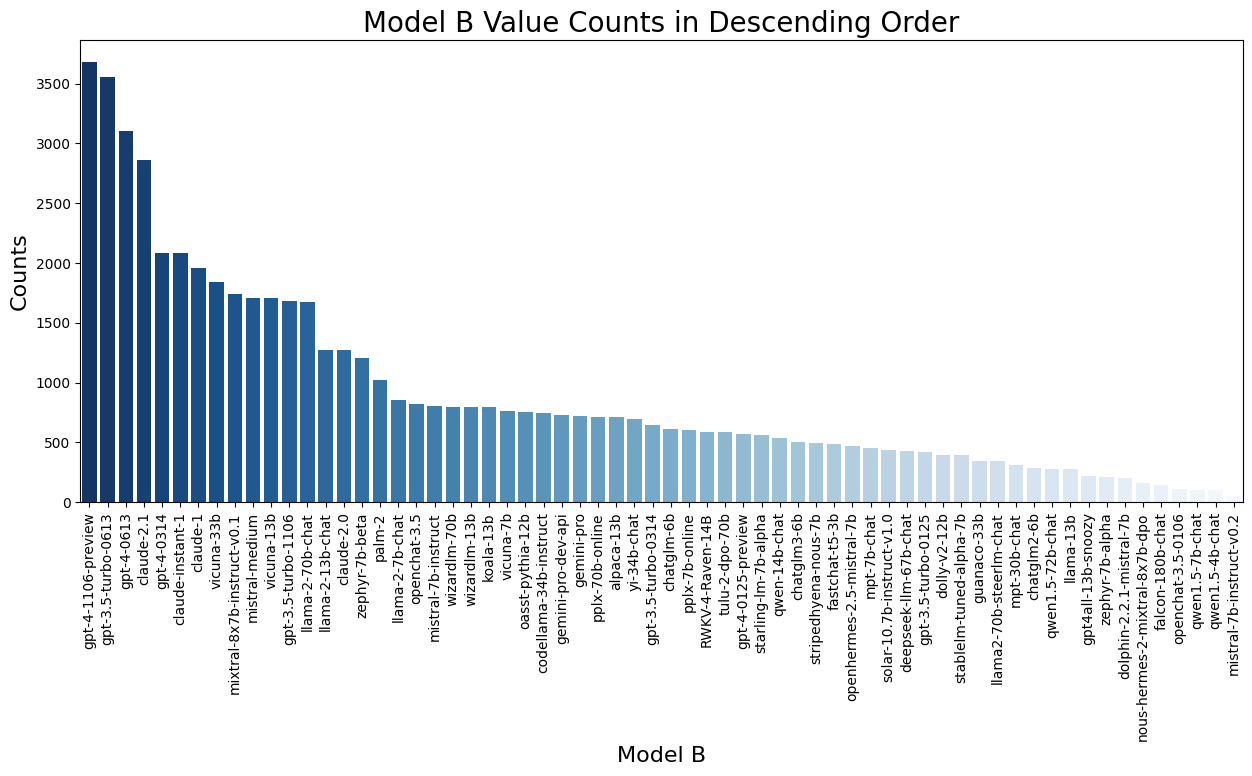

model_b
gpt-4-1106-preview          3709
gpt-3.5-turbo-0613          3530
gpt-4-0613                  3066
claude-2.1                  2724
claude-instant-1            2051
                            ... 
falcon-180b-chat             141
openchat-3.5-0106            136
qwen1.5-7b-chat              102
qwen1.5-4b-chat              100
mistral-7b-instruct-v0.2      46
Name: count, Length: 64, dtype: int64


In [10]:
# Get value counts in descending order
value_counts_b = train_df['model_a'].value_counts(ascending=False)

# Create a rainbow color palette with the same number of colors as bars
colors = sns.color_palette("Blues", len(value_counts_b))[::-1]

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=value_counts_b.index, y=value_counts_b.values, palette=colors)
plt.xlabel('Model B', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xticks(rotation=90)
plt.title('Model B Value Counts in Descending Order', fontsize=20)
plt.grid(False)
plt.savefig("results/info/model_b_value_counts.png", bbox_inches='tight', dpi=300)
plt.show()

print(train_df['model_b'].value_counts())

In [11]:
import plotly.io as pio
pio.renderers.default = 'iframe'

def visualize_battle_count(train_df, title, show_num_models=30):
    ptbl = pd.pivot_table(train_df, index="model_a", columns="model_b", aggfunc="size",
                          fill_value=0)
    battle_counts = ptbl + ptbl.T
    ordering = battle_counts.sum().sort_values(ascending=False).index
    ordering = ordering[:show_num_models]
    fig = px.imshow(battle_counts.loc[ordering, ordering],
                    title=title, text_auto=True)
    fig.update_layout(
        title=dict(
            text="Battle Count of Each Combination of Models",
            font=dict(size=24),
            x=0.5,       # Center horizontally
            y=0.08,       # Move to bottom
            xanchor='center',
            yanchor='bottom'
        ),
        xaxis_title=dict(text="Model B", font=dict(size=18)),
        yaxis_title=dict(text="Model A", font=dict(size=18)),
        xaxis_side="top",
        height=800,
        width=800,
        font=dict(size=10)
    )
    fig.update_traces(hovertemplate=
                      "Model A: %{y}<br>Model B: %{x}<br>Count: %{z}<extra></extra>")
    return fig

fig = visualize_battle_count(train_df, title="Battle Count of Each Combination of Models", show_num_models=30)
fig.write_html("results/info/battle_count.html")
fig

In [12]:
train_df['label'] = train_df[['winner_model_a', 
                              'winner_model_b', 
                              'winner_tie']].idxmax(axis=1)

label_mapping = {'winner_model_a': 0, 
                 'winner_model_b': 1, 
                 'winner_tie': 2}

train_df['label'] = train_df['label'].map(label_mapping)

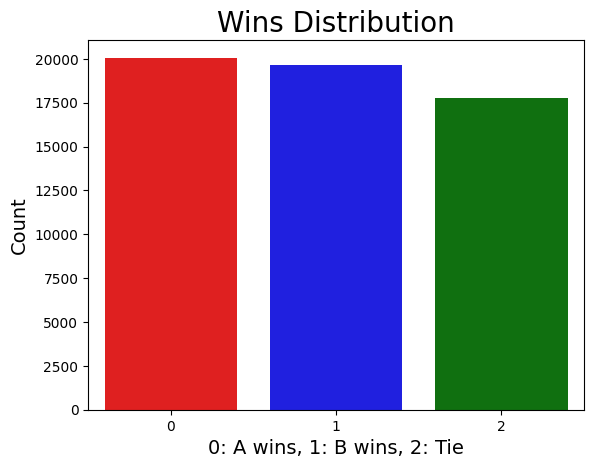


Class Distribution:
label
0    20064
1    19652
2    17761
Name: count, dtype: int64


In [13]:
# Distribution of the Target Variable "Class"
colors = ['red', 'blue', 'green']
sns.countplot(x='label', data=train_df, palette=colors)
plt.title("Wins Distribution", fontsize=20)
plt.xlabel("0: A wins, 1: B wins, 2: Tie", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.savefig("results/info/wins_distribution.png", bbox_inches='tight', dpi=300)
plt.show()

print("\nClass Distribution:")
print(train_df['label'].value_counts())

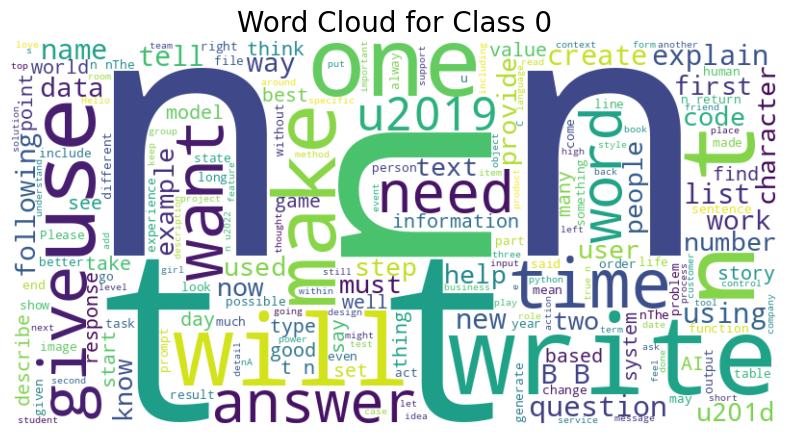

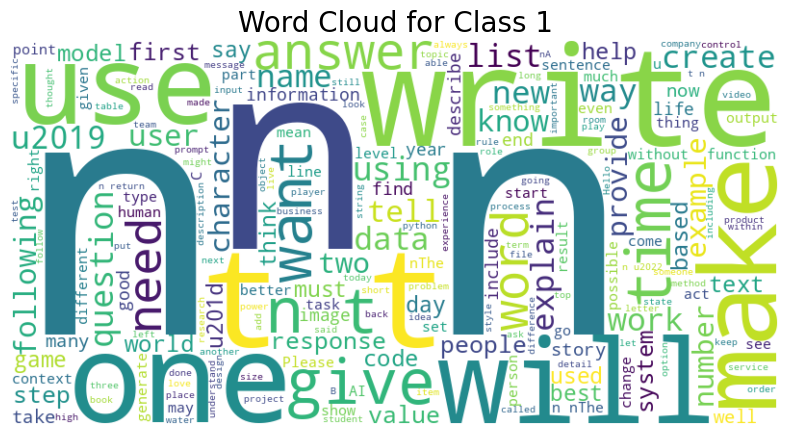

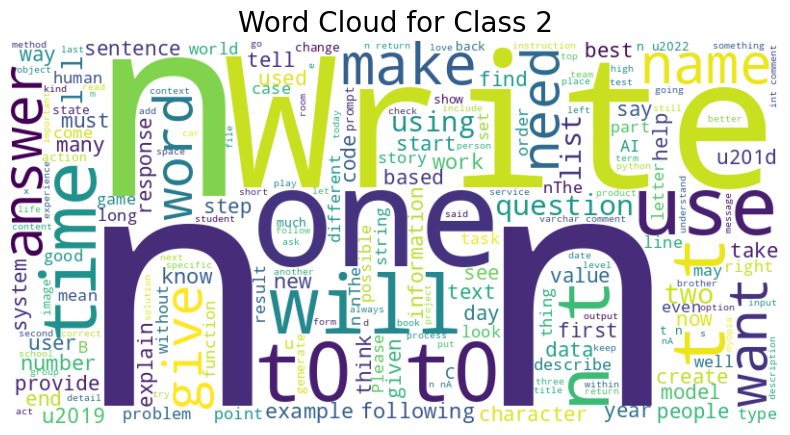

In [15]:
from wordcloud import WordCloud

labels = train_df['label'].unique()

for label in labels:
    textos_prompt = ' '.join(train_df[train_df['label'] == label]['prompt'])

    wordcloud = WordCloud(width=800, height=400, 
                          background_color='white').generate(textos_prompt)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class {label}', fontsize=20)
    plt.savefig(f"results/info/wordcloud_{label}.png", bbox_inches='tight', dpi=300)
    plt.show()